# Ligand Poses (Blind Docking)
The [Ligand Poses challenge](https://polarishub.io/competitions/asap-discovery/antiviral-ligand-poses-2025) of the [ASAP Discovery competition](https://polarishub.io/competitions/asap-discovery/antiviral-admet-2025) is a little more complex than the other challenges. 

The goal in ligand pose challenge is to predict the 3D binding pose of the ligand, given the ligand's SMILES (or CXSMILES, to be more precise) and the protein's sequence. There are several ways of doing this such as docking or cofolding.

`NB: because the Polaris API currently does not ingest whole protein structures your submission will only consist of the predicted ligand poses. Because of this it is critical that you properly align your predicted ligand-protein complexes to the reference complexes that we provide, otherwise we can not properly evaluate your submission!`

Let's take a look!

## Load the competition
Make sure you're logged in! If you haven't logged in yet, simply run `polaris login` in a terminal of your choice. 

In [1]:
import polaris as po

competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-02-14 08:46:14] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=899095;file:///Users/jenkescheen/projects/polaris/polaris/polaris/_artifact.py\_artifact.py]8;;\:]8;id=492493;file:///Users/jenkescheen/projects/polaris/polaris/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.7).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=355019;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py\_base.py]8;;\:]8;id=937442;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

Let's again cache it as suggested!

In [2]:
competition.cache()

Output()

[08:46:15] Copying to destination                                                                      ]8;id=702292;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py\_base.py]8;;\:]8;id=18890;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py#381\381]8;;\
           /Users/jenkescheen/Library/Caches/polaris/datasets/7b245e4a-ebb0-4ee8-a15c-3acfb6efe3f8/dat             
           a.zarr                                                                                                  

           For large Zarr archives, this may take a while.                                             ]8;id=474476;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py\_base.py]8;;\:]8;id=629884;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py#382\382]8;;\

[08:46:26]  Success: Copying Zarr keys                                                                ]8;id=198052;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py\context.py]8;;\:]8;id=744724;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=270766;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py\context.py]8;;\:]8;id=796662;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py#53\53]8;;\

'/Users/jenkescheen/Library/Caches/polaris/datasets/7b245e4a-ebb0-4ee8-a15c-3acfb6efe3f8'

In [3]:
# let's get the training and test data for this subchallenge
train, test = competition.get_train_test_split()

## Training Set

There are two levels of information in the training set. The simpler level just contains the protein sequence, CXSMILES for the ligand, the ligand pose (as an RDKit molecule object) and the _target_, i.e. whether the training point is in SARS-CoV-2 Mpro or MERS-CoV Mpro:

In [4]:

train[0]

({'Chain A Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
  'Protein Label': 'SARS-CoV-2 Mpro',
  'Chain B Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
  'CXSMILES': 'c1ccc(SCC[NH+]2CCOCC2)cc1'},
 <rdkit.Chem.rdchem.Mol at 0x28a8742c0>)

The more complex level contains the actual ligand-protein complexes for the training set. These are formatted as `numpy` arrays that can be parsed by a method of your choosing (you can use calls like `datapoint["Complex Structure"].coord`, `datapoint["Complex Structure"].atom_name` and `datapoint["Complex Structure"].chain_id` to get relevant information). 

This may seem like a complicated format, but this is more convenient for ingestion by python workflows. You'll find that `datapoint["Complex Structure"]` and `datapoint["Protein Structure"]` are `biotite.structure.AtomArray` objects and `datapoint["Ligand Pose"]` is an `rdkit.Chem.rdchem.Mol`.

In [5]:
# Get some info for a single data point in the training set
competition[0]["Complex Structure"].coord

array([[ -2.395,   4.215, -17.097],
       [ -1.977,   5.504, -16.496],
       [ -2.341,   5.543, -15.01 ],
       ...,
       [ 21.061,  -8.835,   7.04 ],
       [ 22.269, -10.73 ,   6.01 ],
       [ 28.088, -10.911,   5.35 ]], dtype=float32)

### Raw data dump of training set
If you would rather work with the training set SDF/PDB files directly, you can access the raw data dump that this dataset has been created from.

In [6]:
import fsspec
import zipfile

""" 
Note, you may need to !pip install some extra packages to make this cell work!
"""

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/raw_data_package.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./raw_data_package/")

# then in your terminal you can navigate to ./raw_data_package/ligand-posing/ to see all training data as files.


## Test set

The test set is simpler because we're only giving you the protein sequence, ligand CXSMILES and what the target protein is (i.e. either SARS-CoV-2 Mpro or MERS-CoV Mpro):

In [7]:
test[0]

{'Chain A Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'Protein Label': 'MERS-CoV Mpro',
 'Chain B Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'CXSMILES': 'O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1'}

# Build a model
Building a ligand pose prediction model is non-trivial and outside the scope of this notebook. We're looking forward to seeing what you come up with!

# Prepare your inputs
Since building a ligand pose prediction model is out of scope, we'll simply generate a conformer using RDKit for the sake of simplicitly. This just serves as a way to show how to prepare your inputs for submission.

In [8]:
import datamol as dm
import numpy as np

from tqdm import tqdm

y_pred = []

for x in tqdm(test): 

    # Generate a random conformer
    mol = dm.to_mol(x["CXSMILES"])
    mol = dm.conformers.generate(mol, n_confs=1)

    # That's our prediction
    y_pred.append(mol)

100%|██████████| 195/195 [00:14<00:00, 13.71it/s]


## Alignment

We will evaluate your predictions using RMSD between your predicted pose and the actual pose that we've withheld. This raises a problem: You could have the perfect pose, but rotated or somewhere else in cartesian space which would ruin your evaluation. To allow for a fair comparison, everyone is therefore required to align their pose predictions ahead of submission with a reference structure that we provide.

Let's start by downloading the reference structures!

`WARNING:  UNLESS YOU CORRECTLY ALIGN YOUR PREDICTIONS WILL NOT BE ABLE TO BE JUDGED CORRECTLY, PLEASE READ THE ALIGNMENT SECTIONS BELOW CAREFULLY`



In [9]:
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/ligand_poses_reference_structures.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./reference_structures/")

We will now show an example of how to align your predictions to the reference structures. 

**IMPORTANT: you must submit your predictions in the same order that they are presented in the test set from polaris**

Additionally, As each example in the test set belongs to `either the SARS-CoV-2 Mpro or MERS-CoV Mpro` we need to make sure we align to the correct protein. 

There are many ways of doing this; here we present a method that has worked well for us

Assuming we have PDB files of our predictions available on disk as `my_preds` (there are lots of ways to do this so please choose method appropriate for you)

In [18]:
# mockup 
my_preds = [f"path_to_preds/{i}" for i in range(len(test))]
protein_labels = [x["Protein Label"] for x in test]


#### NEED TO DO THIS DIFFERENTLY, WE NEED CONTINUINITY WITH y_pred FROM THE CELLS ABOVE AND BELOW

You need to use the reference complexes available in the full data package to align to, edit these paths as required.

In [21]:
import pymol
def align_pred(protein_path, protein_label, index):
    # find out which target we need to be aligning to
    if protein_label == 'MERS-CoV Mpro':
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/MERS-CoV-Mpro/reference_structure/complex.pdb"
    elif protein_label == "SARS-CoV-2 Mpro":
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/SARS-CoV-2-Mpro/reference_structure/complex.pdb"
    else:
        raise Exception

    # in a pymol session, align the query structure to the reference structure
    pymol.cmd.delete("all")
    pymol.cmd.load(protein_path, "mobile")
    pymol.cmd.load(ref_path, "reference")
    pymol.cmd.align(
        "chain A and mobile",
        "chain A and reference",
    )

    # write to files
    ret_path = f"my_preds_aligned_{index}.pdb"
    ret_path_pse = f"my_preds_aligned_{index}.pse"
    pymol.cmd.save(ret_path_pse)
    pymol.cmd.save(ret_path, "mobile")
    return ret_path

to then call this you would do something like 

In [ ]:
for i, (pred, label) in enumerate(zip(my_preds, protein_labels)):
    print(f"aligning index: {i}, pred: {pred}, label: {label}")
    aligned_path = align_pred(pred, label, i)

You can then inspect the aligned PDBs and saved pymol session files to see if the alignment looks good. **PLEASE CONFIRM THAT YOU ARE HAPPY WITH THE ALIGNMENT BEFORE SUBMITTING**

## Towards submission

## Serialize

We only judge the position of the ligand molecule. As such you need to either extract it or provide it as an rdkit mol already **after alignment to the reference structure**

To submit to Polaris, you need to serialize the molecules to a bytestring. Please stick to the exact below example.

In [23]:
import base64
from rdkit import Chem


def serialize_rdkit_mol(mol: Chem.Mol): 
    props = Chem.PropertyPickleOptions.AllProps
    mol_bytes = mol.ToBinary(props)
    return base64.b64encode(mol_bytes).decode('ascii')  


y_pred_serialized = [serialize_rdkit_mol(mol) for mol in y_pred]

#### Sanity check
Let's deserialize the molecule again to make sure we've done this correctly

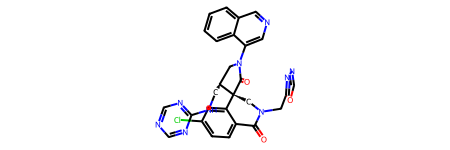

In [24]:
deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[0].encode("ascii")))
deserialized

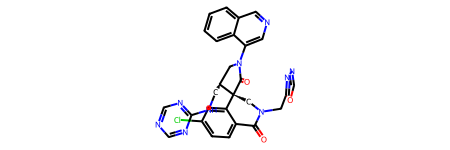

In [25]:
y_pred[0]

In [26]:
dm.same_mol(y_pred[0], deserialized)

True

# Submit to Polaris

In [28]:
competition.submit_predictions(
    predictions=y_pred_serialized,
    prediction_name="my-second-predictions",
    prediction_owner="cwognum",
    report_url="https://www.example.com", 
    # The below metadata is optional, but recommended.
    github_url="https://github.com/polaris-hub/polaris",
    description="Just testing the Polaris API here!",
    tags=["tutorial"],
    user_attributes={"Framework": "RDKit", "Method": "Dummy Baseline"}
)

✅ SUCCESS: Your competition predictions have been successfully uploaded to the Hub for evaluation.
 


For the ASAP competition, we will only evaluate your latest submission. 

The results will only be disclosed after the competition ends and during any intermediate leaderboards.

The End.